# Supermarket Data Analysis

In this project, we'll be performing some exploratory data analysis on the sample supermarket data.


# Objectives

* Performing EDA on the data to derive insights on how the profits can be increased.
* Discovering the weak areas of the sales deparment in order to improve the sales.
*  Discovering hidden trends within the data that will allow the sales deparment to cater to region-specific needs of the buyers.


In [61]:
import pandas as pd

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
!pip install pywaffle --quiet
from pywaffle import Waffle

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [63]:
df= pd.read_csv("../input/thesparkfoundation/SampleSuperstore.csv")

In [64]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [65]:
df.shape

(9994, 13)

In [66]:
df.isnull().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

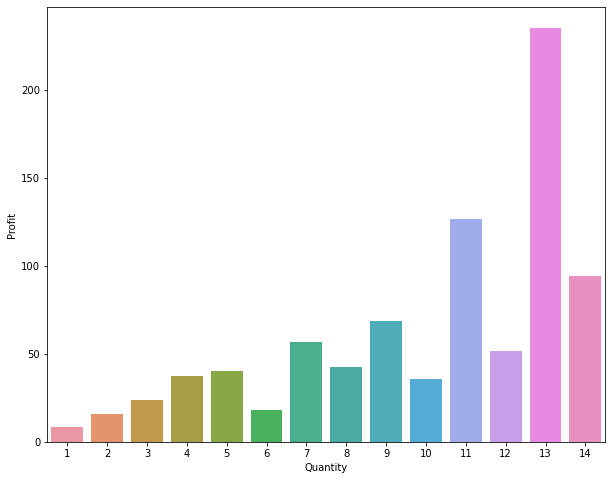

In [67]:
quant=df[["Quantity", "Profit"]].groupby(['Quantity'], as_index=False).mean().sort_values(by='Profit', ascending=False)
plt.figure(figsize=(10,8))

sns.barplot(x='Quantity', y='Profit', data=quant)

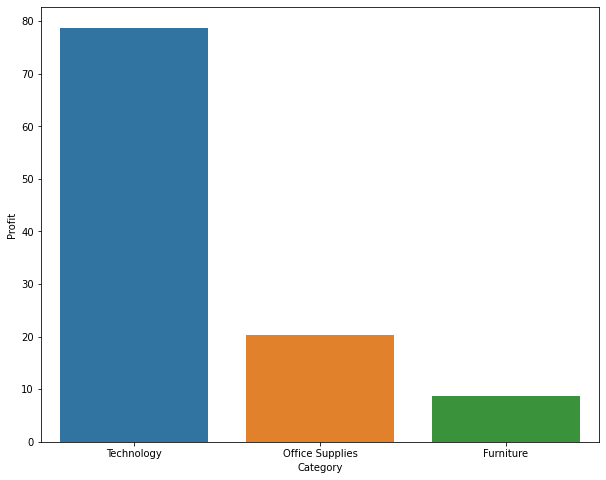

In [68]:
cat=df[["Category", "Profit"]].groupby(['Category'], as_index=False).mean().sort_values(by='Profit', ascending=False)
plt.figure(figsize=(10,8))

sns.barplot(x='Category', y='Profit', data=cat)

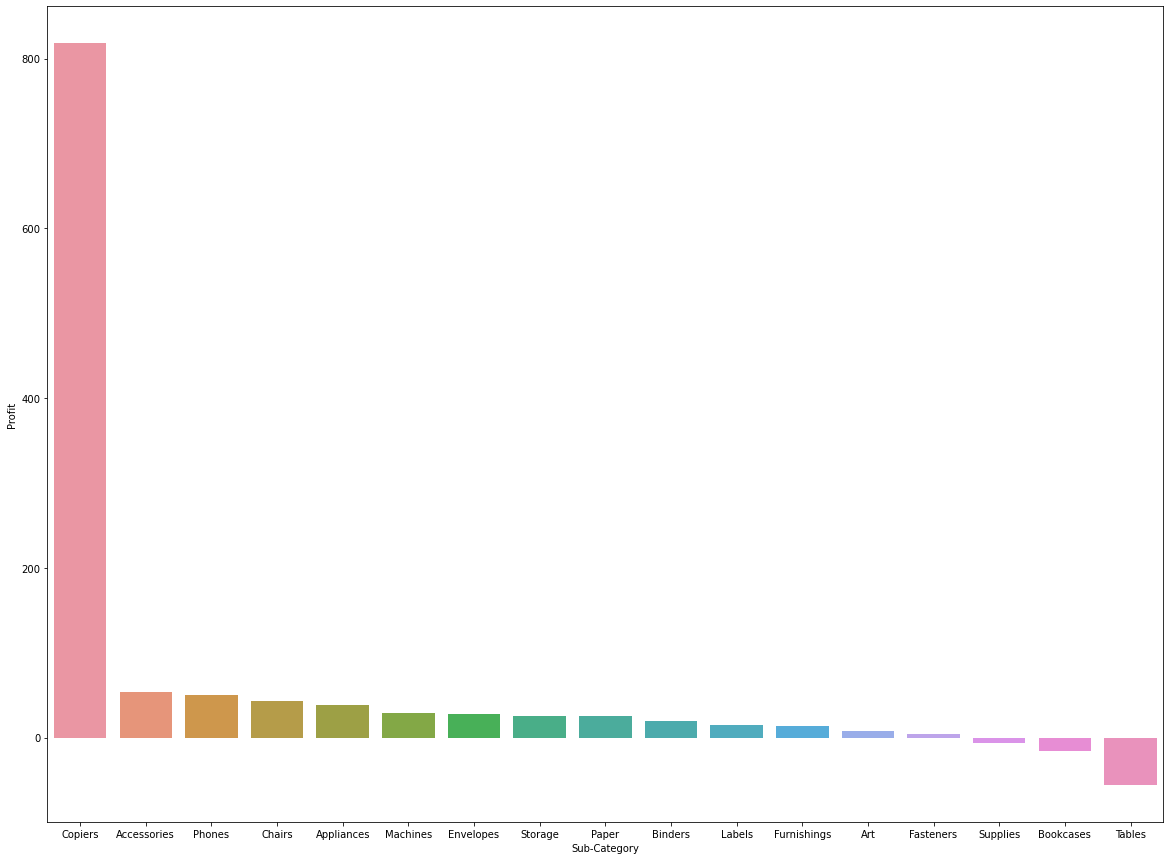

In [69]:
sub_cat=df[["Sub-Category", "Profit"]].groupby(['Sub-Category'], as_index=False).mean().sort_values(by='Profit', ascending=False)
plt.figure(figsize=(20,15))

sns.barplot(x='Sub-Category', y='Profit', data=sub_cat)

In [70]:
numerical = ['Sales','Quantity','Discount','Profit']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd751f53850>,
      dtype=object)

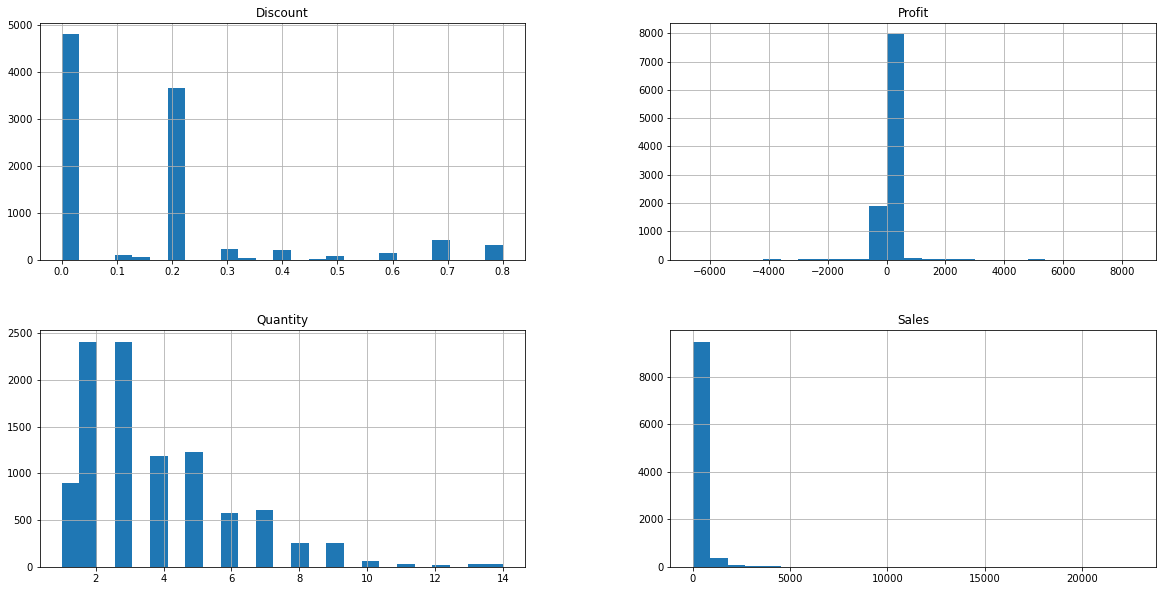

In [71]:
df[numerical].hist(bins=25, figsize=(20,10), layout=(2, 2))

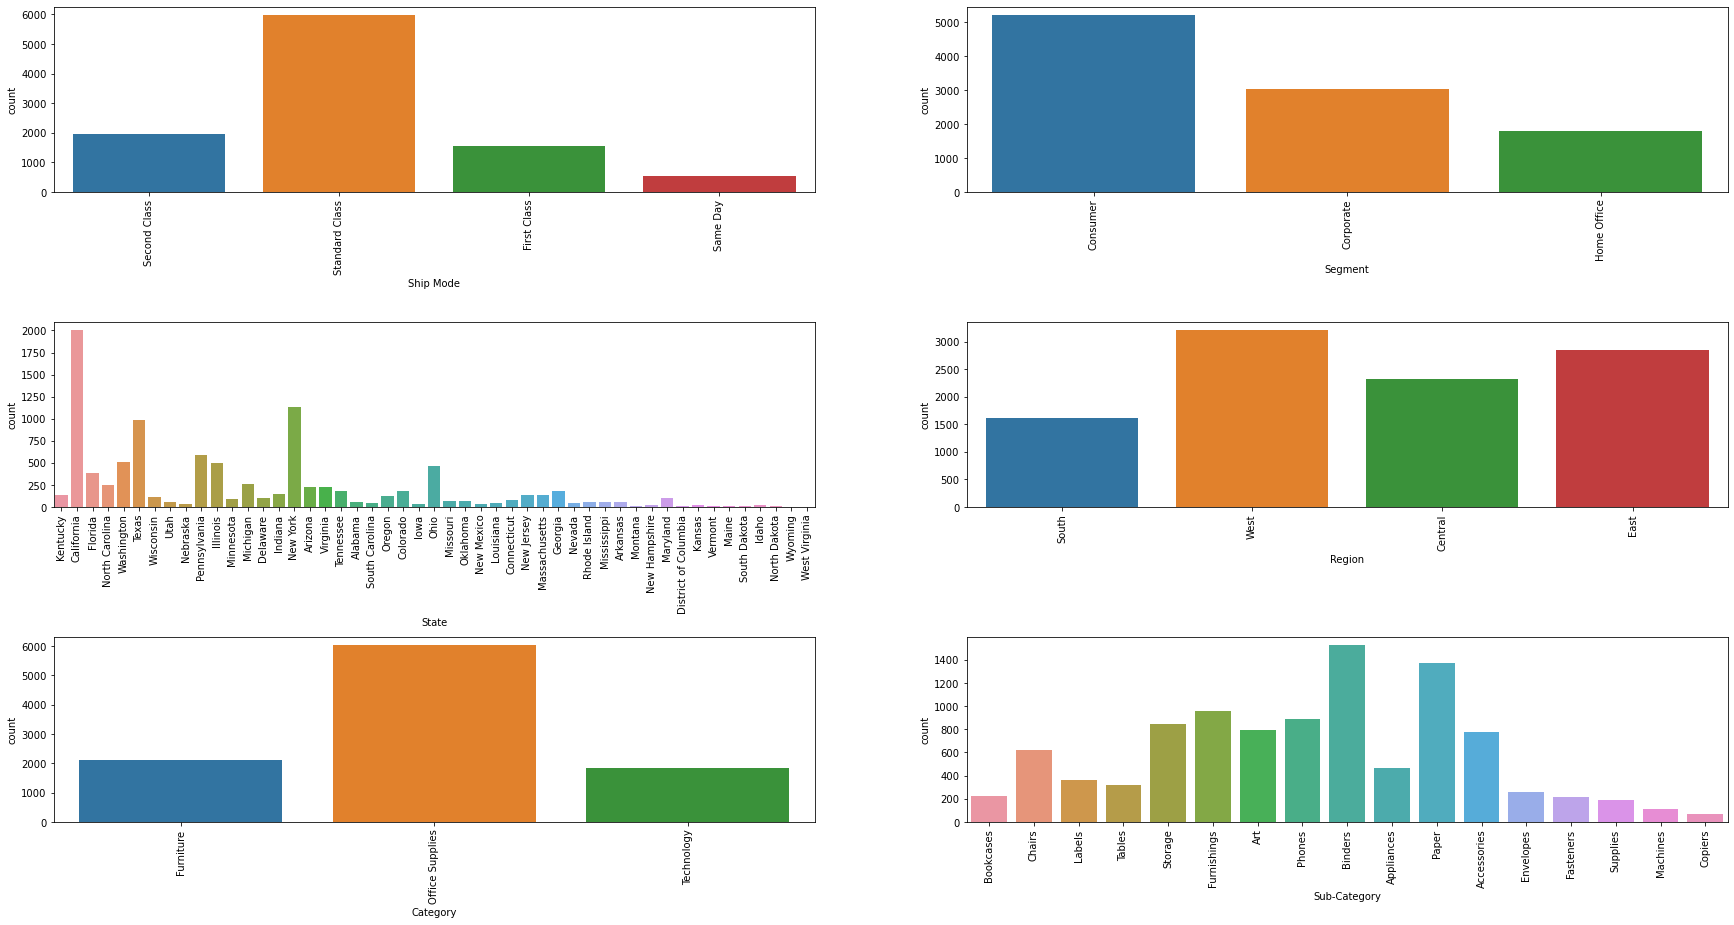

In [72]:

categorical = ['Ship Mode','Segment','State','Region','Category','Sub-Category']
fig, ax = plt.subplots(3, 2, figsize=(30, 15))

plt.subplots_adjust(hspace=0.7)
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [73]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
df['state_code'] = df.State.apply(lambda x: state_code[x])

In [74]:
state = df[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state.index, 
    z = state.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()
5

5

Highest sales in the state of California $450K of goods.  New York second highest sales,$300k of goods.  The states of Texas and Washington $170K and 140K in sales respectively.

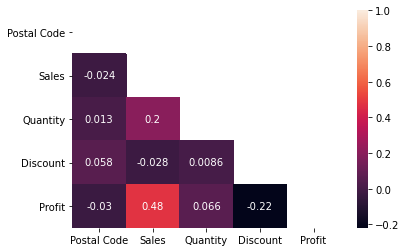

In [75]:
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix)

* there is strong positive correlation between sales price and profit
* negative correlation between discount and sales price

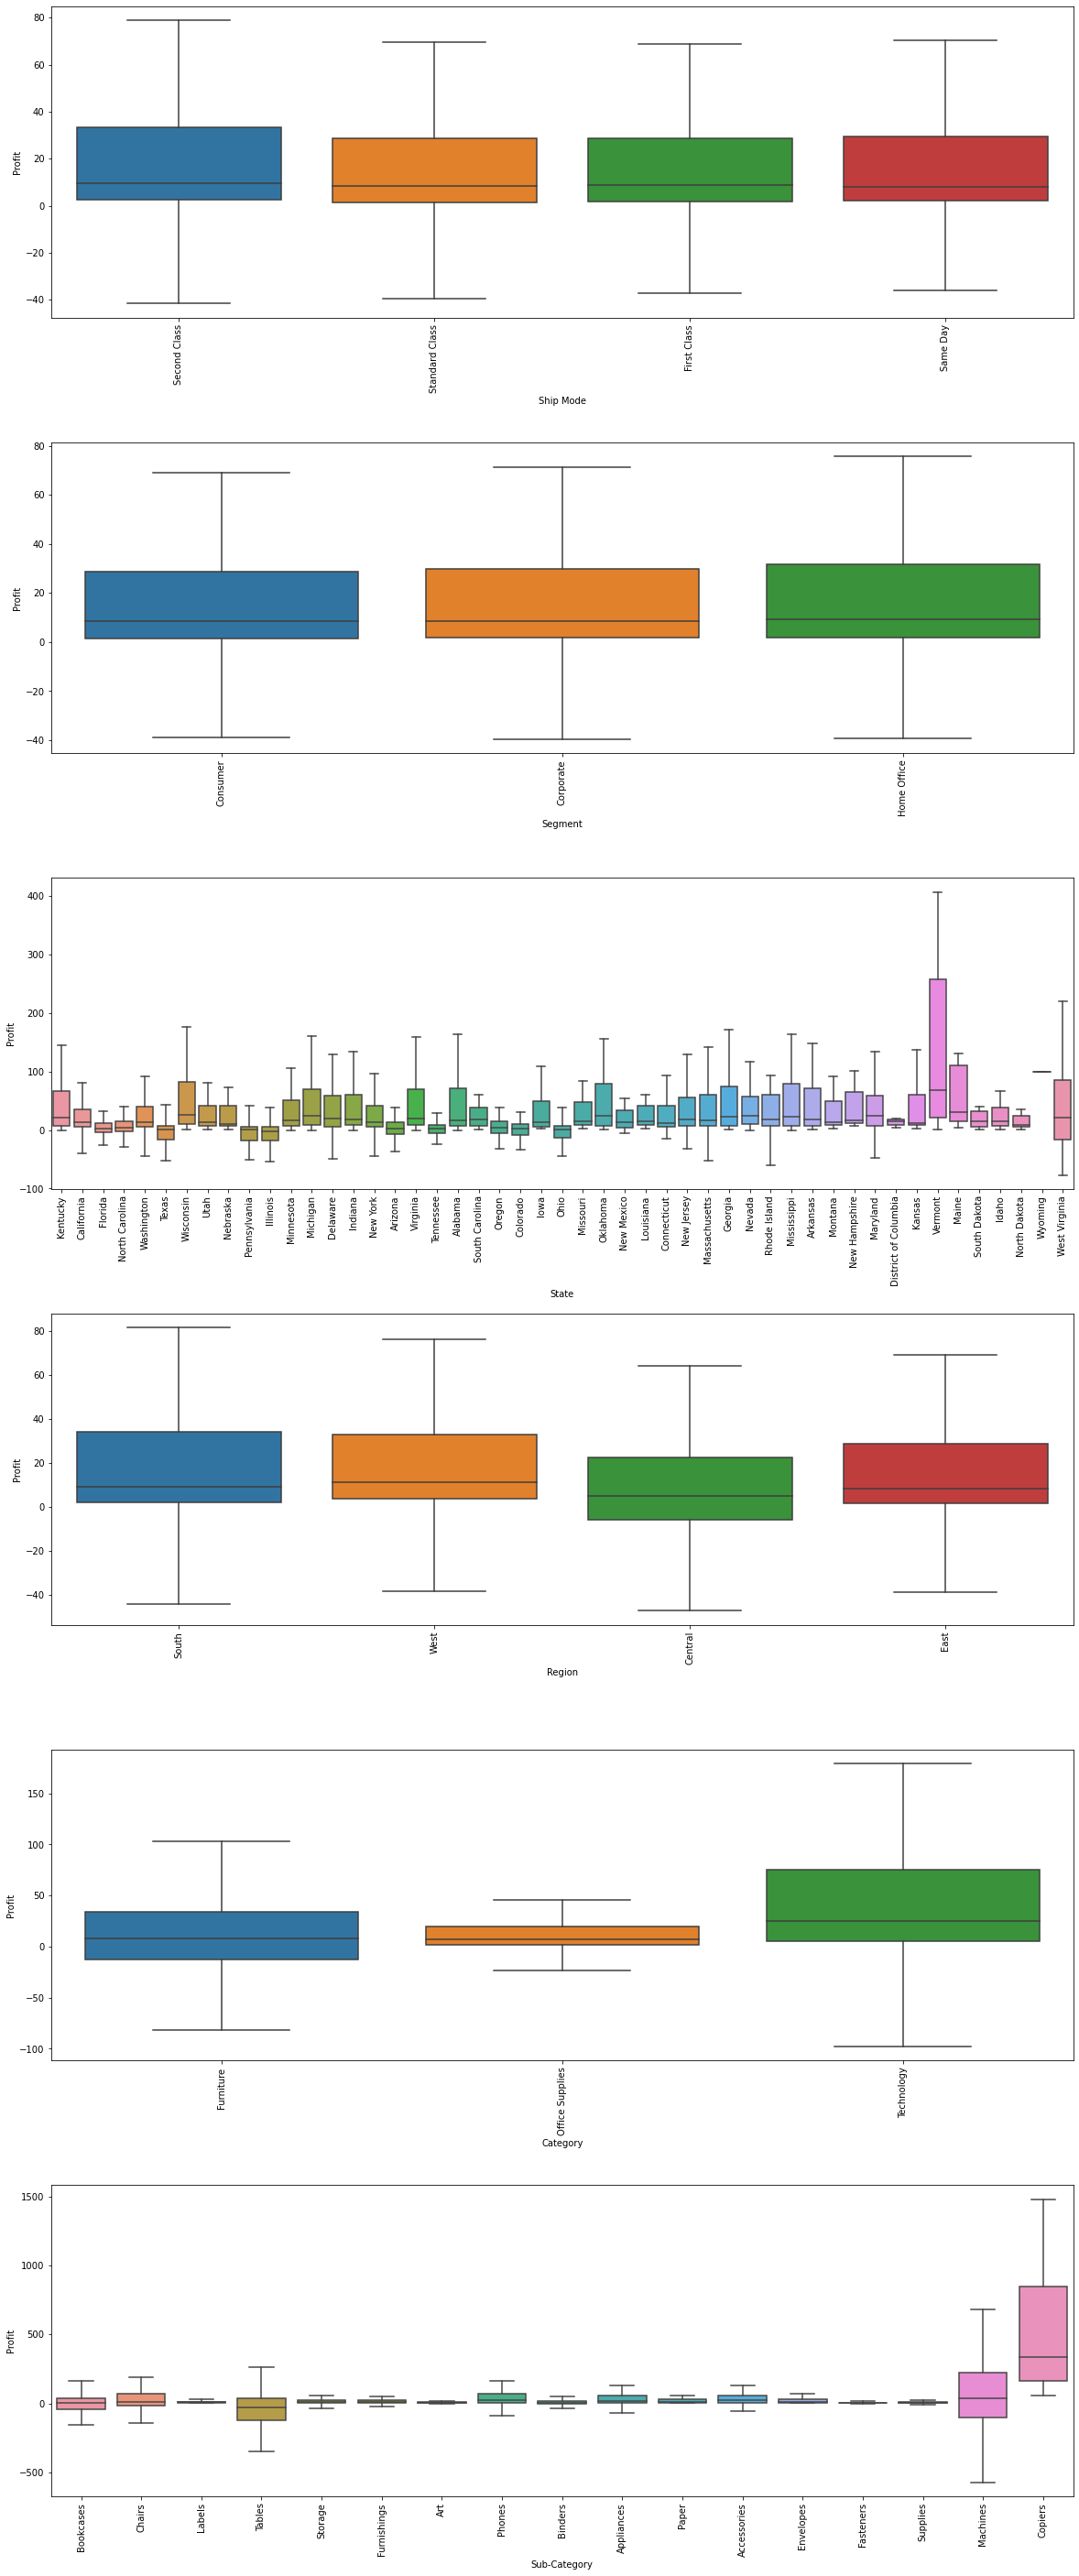

In [76]:
fig, ax = plt.subplots(6, 1, figsize=(20,50))
plt.subplots_adjust(hspace=0.4)
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y= 'Profit', data=df, ax=subplot,showfliers=False)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [77]:
state['profit_to_sales'] = state['Profit'] / state['Sales']

# adding state name
state_name = {v: k for k, v in state_code.items()}
state['States'] = state.index
state['States'] = state.States.apply(lambda x: state_name[x])

# sorting the dataframe
state = state.sort_values(by = ['profit_to_sales'], ascending=True)

In [78]:
fig = px.bar(state, x = 'profit_to_sales', y = 'States', title = 'PRICE TO SALES RATIO',
            color = 'Profit', color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(
    autosize=False,
    height=1000,
    xaxis = dict(
        tickmode = 'array',
        ticktext = state.States,
        title='Profit to Sales Ratio',
    ),
    yaxis=dict(title='State'),
)
fig.show()

* Ohio has the worst profit-to-sales ratio in terms of total sales and the losses beared.
* Delaware has the highest profit-to-sales ratio.
* New York, California and Washington DC don't have the highest profit-to-sales ratio. This means that the company can further improve its sales/profits in these states.

In [79]:
ship_segment = df.groupby(['Segment'])
segment_list = df.Segment.value_counts().index
cat_list = df.Category.value_counts().index

for segment in segment_list:
    seg_shipping = ship_segment.get_group(segment)
    standard, second, first, same = [], [], [], []
    for cat in cat_list:
        count = seg_shipping.groupby(['Category']).get_group(cat)['Ship Mode'].value_counts()
        standard.append(count[0]), second.append(count[1]), first.append(count[2]), same.append(count[3])
        
    fig = go.Figure()
    fig.add_trace(go.Bar(x = cat_list,y = standard,name='Standard Class',marker_color='rgb(137,51,51)'
                        ))
    fig.add_trace(go.Bar(x = cat_list,y = second,name='Second Class',marker_color='rgb(234,84,84)'
                        ))
    fig.add_trace(go.Bar(x = cat_list,y = first,name='First Class',marker_color='rgb(250,127,78)'
                        ))
    fig.add_trace(go.Bar(x = cat_list,y = same,name='Same Day',marker_color='lightsalmon'
                        ))

    fig.update_layout(
        barmode ='group',
        width = 800,
        title = segment.upper(),
        yaxis = dict(title = 'Number of Deliveries'))
    fig.show()

* Standard class shipping is the most used shipping method across all consumer segments and product categories.
* Across all three consumer segments, office supplies are the most bought products, and the technology items are the least bought products.

In [80]:
df["Cost"] = df['Sales']/df['Quantity']

#finding profit per sold items

df['Profit'] = df['Profit']/df['Quantity']

#Grouping Data
data_group_one = df[['Ship Mode','Segment','Category','Sub-Category','Cost','Discount','Profit']]
data_group_one = data_group_one.groupby(['Ship Mode','Segment','Category','Sub-Category'],as_index=False).mean()

#Data for first Class & consumer
data_group_1 = data_group_one[data_group_one['Ship Mode'] == 'First Class']
data_group_1 = data_group_1[data_group_1['Segment'] == 'Consumer']

#Data for Same Day & consumer
data_group_2 = data_group_one[data_group_one['Ship Mode'] == 'Same Day']
data_group_2 = data_group_2[data_group_2['Segment'] == 'Consumer']

#Data for Second Class & consumer
data_group_3 = data_group_one[data_group_one['Ship Mode'] == 'Second Class' ]
data_group_3 = data_group_3[data_group_3['Segment'] == 'Consumer']

#Data for Standard Class & consumer
data_group_4 = data_group_one[data_group_one['Ship Mode'] == 'Standard Class']
data_group_4 = data_group_4[data_group_4['Segment'] == 'Consumer']


In [81]:
data_group_1

,Ship Mode,Segment,Category,Sub-Category,Cost,Discount,Profit
0,First Class,Consumer,Furniture,Bookcases,112.006431,0.219615,-3.730315
1,First Class,Consumer,Furniture,Chairs,143.274805,0.182927,6.655200
2,First Class,Consumer,Furniture,Furnishings,30.094775,0.125000,4.873847
3,First Class,Consumer,Furniture,Tables,158.668647,0.270588,-11.704588
4,First Class,Consumer,Office Supplies,Appliances,57.390222,0.106667,13.650020
5,First Class,Consumer,Office Supplies,Art,8.708590,0.088525,2.066900
6,First Class,Consumer,Office Supplies,Binders,47.134345,0.400000,7.733378
7,First Class,Consumer,Office Supplies,Envelopes,30.631500,0.100000,13.355225
8,First Class,Consumer,Office Supplies,Fasteners,3.217250,0.037500,1.145331
9,First Class,Consumer,Office Supplies,Labels,8.441000,0.093750,3.836563


In [82]:
data_group_2

,Ship Mode,Segment,Category,Sub-Category,Cost,Discount,Profit
51,Same Day,Consumer,Furniture,Bookcases,281.308500,0.175000,12.584300
52,Same Day,Consumer,Furniture,Chairs,136.012050,0.150000,6.294550
53,Same Day,Consumer,Furniture,Furnishings,29.608125,0.231250,1.014825
54,Same Day,Consumer,Furniture,Tables,131.065667,0.275000,-13.217000
55,Same Day,Consumer,Office Supplies,Appliances,96.591667,0.158333,23.971658
56,Same Day,Consumer,Office Supplies,Art,10.207000,0.083333,2.496779
57,Same Day,Consumer,Office Supplies,Binders,21.718932,0.363636,5.481839
58,Same Day,Consumer,Office Supplies,Envelopes,11.188000,0.100000,4.745575
59,Same Day,Consumer,Office Supplies,Fasteners,2.849800,0.040000,1.118970
60,Same Day,Consumer,Office Supplies,Labels,9.639833,0.050000,3.868800


In [83]:
data_group_3

,Ship Mode,Segment,Category,Sub-Category,Cost,Discount,Profit
102,Second Class,Consumer,Furniture,Bookcases,135.215841,0.230000,-8.362722
103,Second Class,Consumer,Furniture,Chairs,141.400863,0.158904,11.222537
104,Second Class,Consumer,Furniture,Furnishings,22.225535,0.143434,3.352032
105,Second Class,Consumer,Furniture,Tables,159.985527,0.252703,-17.055973
106,Second Class,Consumer,Office Supplies,Appliances,68.753744,0.194872,5.101446
107,Second Class,Consumer,Office Supplies,Art,9.347057,0.066667,2.388208
108,Second Class,Consumer,Office Supplies,Binders,32.955007,0.317391,7.704775
109,Second Class,Consumer,Office Supplies,Envelopes,12.192769,0.092308,5.259769
110,Second Class,Consumer,Office Supplies,Fasteners,3.482947,0.073684,1.359389
111,Second Class,Consumer,Office Supplies,Labels,10.512875,0.043750,4.654547


In [84]:
data_group_4

,Ship Mode,Segment,Category,Sub-Category,Cost,Discount,Profit
153,Standard Class,Consumer,Furniture,Bookcases,137.662188,0.220263,-9.880489
154,Standard Class,Consumer,Furniture,Chairs,133.059779,0.174872,10.041751
155,Standard Class,Consumer,Furniture,Furnishings,27.188042,0.132862,4.304941
156,Standard Class,Consumer,Furniture,Tables,166.681376,0.269355,-19.046022
157,Standard Class,Consumer,Office Supplies,Appliances,52.644689,0.202027,4.704190
158,Standard Class,Consumer,Office Supplies,Art,8.662656,0.080469,2.019829
159,Standard Class,Consumer,Office Supplies,Binders,40.660662,0.390397,7.690025
160,Standard Class,Consumer,Office Supplies,Envelopes,20.354024,0.081928,8.612919
161,Standard Class,Consumer,Office Supplies,Fasteners,3.558928,0.075362,1.177009
162,Standard Class,Consumer,Office Supplies,Labels,8.271805,0.049558,3.834424


#  Loss incurred items groupwise

* data_group_1:Bookcases,Tables,Machines
* data_group_2:Tables
* data_group_3:Bookcases,Tables,Supplies
* data_group_4:Bookcases,Tables,Supplies,Machines


* BookCases: In bookcases according to pattern shown in the data when cost per item is around 100 and discount is around 0.1% and where cost per item is around 200 and discount is around 0.2% there is profit.So,Discount in these items should increase by 0.1% per 100 increase in the cost of the item.

* Tables: In case of tables where ever discount is around 0.2% there is loss so discount here should be around 0.1%.
 
* Machines:The problem is with the segment consumer they buy less of this item so the cost should be increased and discount should be negligible.
 
* Supplies:Here problem in the ship mode where discount must be around 0.01 in first class while in standard class there should be no discount.